# Convolution Layer

In [3]:
# Settings
import keras

conv1_nKernel=32
conv2_nKernel=64
dense1_output=64
dense2_output=10
nCategories = 10

## Prepare CIFAR Dataset
- Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
- [Keras Datasets](https://keras.io/datasets/)

In [9]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(-1, 32*32, 3)
x_test = x_test.reshape(-1, 32*32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
t = y_train
y_train = keras.utils.to_categorical(y_train, nCategories)
y_test = keras.utils.to_categorical(y_test, nCategories)

### Dataset Viasualize

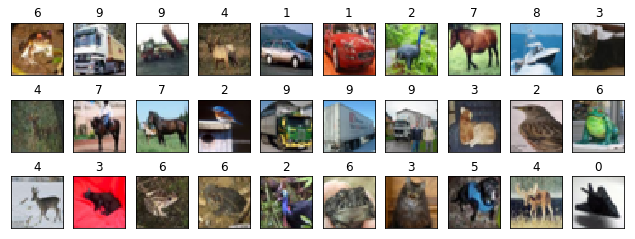

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(x_train[i].reshape(32,32,3), vmin=0, vmax=1,
                 interpolation='nearest')

In [12]:
x_train.shape

(50000, 1024, 3)

## Convolution Filter with Keras

In [15]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K

In [16]:
# Build Layers
model = Sequential()

# First Convolution Layer (32 kernels)
model.add(Conv2D(conv1_nKernel, input_shape=(32,32,3),
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))
model.add(Conv2D(conv2_nKernel,
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))

# Pool
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(dense1_output, activation='tanh',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'
               ))
model.add(Dense(dense2_output, activation='softmax',
               kernel_initializer='zeros',
               bias_initializer='zeros'
               ))

In [17]:
# Define Compiler
model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

## Training

In [19]:
model.fit(x_train.reshape(-1,32,32,3), y_train, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 352s 7ms/step - loss: 1.7030 - acc: 0.3837
Epoch 2/10
50000/50000 [==============================] - 413s 8ms/step - loss: 1.2831 - acc: 0.5416
Epoch 3/10
50000/50000 [==============================] - 437s 9ms/step - loss: 1.0793 - acc: 0.6193
Epoch 4/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.9531 - acc: 0.6650
Epoch 5/10
50000/50000 [==============================] - 426s 9ms/step - loss: 0.8567 - acc: 0.7009
Epoch 6/10
50000/50000 [==============================] - 401s 8ms/step - loss: 0.7809 - acc: 0.7284
Epoch 7/10
50000/50000 [==============================] - 409s 8ms/step - loss: 0.7121 - acc: 0.7513
Epoch 8/10
50000/50000 [==============================] - 412s 8ms/step - loss: 0.6528 - acc: 0.7744
Epoch 9/10
50000/50000 [==============================] - 408s 8ms/step - loss: 0.5962 - acc: 0.7932
Epoch 10/10
50000/50000 [==============================] - 415s 8ms/step - loss: 0.5520 - a

## Prediction

In [21]:
result = model.evaluate(x_test.reshape(-1,32,32,3), y_test, verbose=1)
print('loss:', result[0], 'accuracy:', result[1])

loss: 0.9966686658859253 accuracy: 0.6782


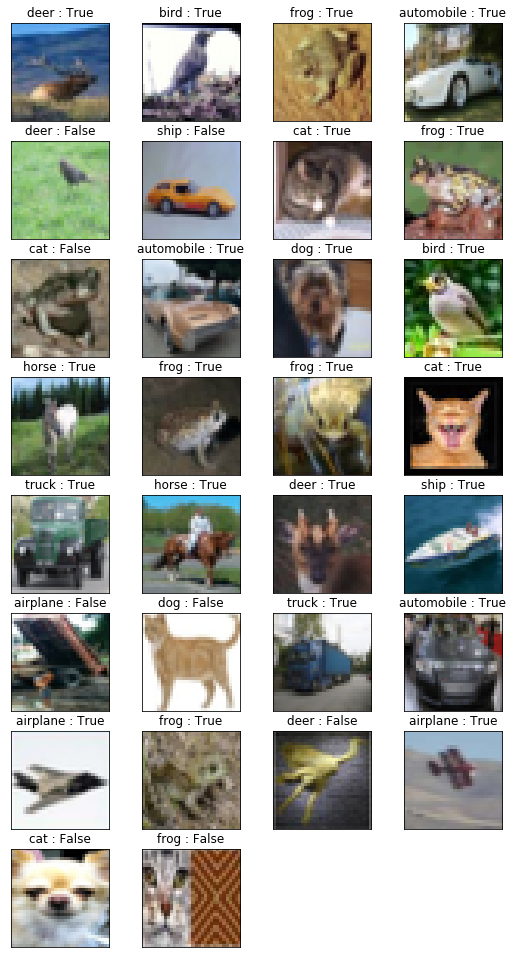

In [40]:
import matplotlib.pyplot as plt
import numpy as np

nShowSample = 30
names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

sampleInd = np.random.choice(x_test.shape[0], nShowSample)

x_sample = x_sample = x_test[sampleInd]
y_sample = y_sample = y_test[sampleInd]

pred = model.predict(x_sample.reshape(-1,32,32,3))

nCol = 4
nRow = int(nShowSample/nCol)+1
w, h = 2, 2
fig = plt.figure(figsize=( (nCol*w)+1, (nRow*h)+1))

for i in range(nShowSample):
    subplot = fig.add_subplot(nRow, nCol, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    predictedInd = np.argmax(pred[i])
    isCorrect = (predictedInd == np.argmax(y_sample[i]))
    subplot.set_title('%s : %s' % (names[predictedInd],isCorrect))
    subplot.imshow(x_sample[i].reshape(32,32,3), vmin=0, vmax=1,
                 interpolation='nearest')